In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1.DataSet

In [2]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)

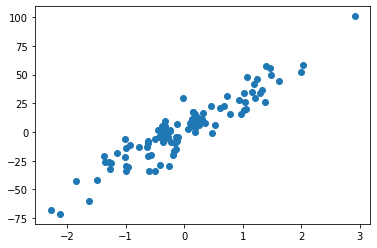

In [3]:
plt.scatter(x, y)

In [5]:
print(x.shape)
'''
on doit redimensionner le vecteur y car quand on utilise la 
fonction make_regression les dimensions de y ne sont pas 
complètes.
'''
y = y.reshape(100,1)
print(y.shape)

(100, 1)
(100, 1)


In [8]:
#la matrice X qui contient la colonne de biais ( la colonne 1,1,1...)
X = np.hstack((x, np.ones(x.shape)))# cette fonction permet de coller deux matrices numpy de mm nombre de lignes
X.shape


(100, 2)

In [9]:
X

array([[ 0.15117084,  1.        ],
       [-0.99119617,  1.        ],
       [ 1.38354916,  1.        ],
       [-0.39257248,  1.        ],
       [ 1.19504865,  1.        ],
       [-0.26309933,  1.        ],
       [-0.15868995,  1.        ],
       [ 0.18279557,  1.        ],
       [ 2.03698979,  1.        ],
       [-0.4088967 ,  1.        ],
       [ 0.67952336,  1.        ],
       [-0.2874194 ,  1.        ],
       [ 0.60918419,  1.        ],
       [-1.34961998,  1.        ],
       [-0.35409343,  1.        ],
       [ 1.62349734,  1.        ],
       [-0.32439249,  1.        ],
       [-1.8468992 ,  1.        ],
       [ 0.32477844,  1.        ],
       [ 0.18354124,  1.        ],
       [-0.99544059,  1.        ],
       [ 0.93397984,  1.        ],
       [ 0.36439501,  1.        ],
       [ 0.46653081,  1.        ],
       [-1.48396705,  1.        ],
       [-0.62651073,  1.        ],
       [-0.16872648,  1.        ],
       [ 1.39466954,  1.        ],
       [ 1.01831086,

In [11]:
#le vecteur theta
theta = np.random.randn(2,1)
theta.shape

(2, 1)

# 2.Modèle

In [12]:
def model(X, theta):
    return X.dot(theta )

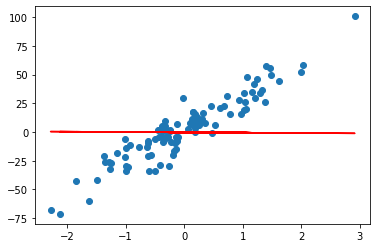

In [17]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c = 'r')

In [15]:
theta

array([[-0.29925118],
       [-0.29473442]])

# 3.Fonction cout

In [18]:
# l'erreur quadratique moyenne
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [19]:
cost_function(X, y, theta)

404.2909456004553

# 4.Descente de gradient

In [21]:
def grad(X, y, theta):
    m = len(y)
    return 1/(2*m) * X.T.dot(model(X, theta) - y)

In [31]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history
        

# 5.Entrainement du modèle

In [47]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.02, n_iterations = 400 )
theta_final

array([[27.1459406 ],
       [ 2.70442164]])

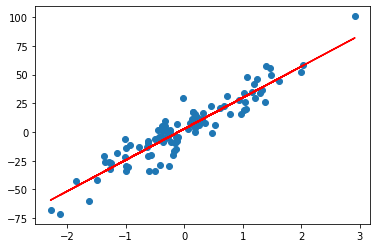

In [48]:
prediction = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, prediction, c='r')

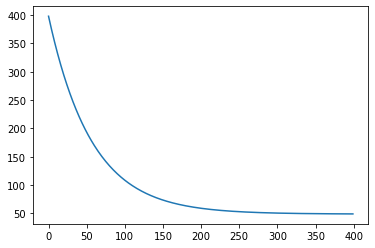

In [50]:
plt.plot(range(400), cost_history)

# Coefficient de détermination

In [51]:
def coef_determination(y, pred):
    u = ((y- pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [52]:
coef_determination(y, prediction)

0.8746739342450114